In [366]:
import autograd.numpy as np
from autograd.misc.flatten import flatten_func
from autograd import grad
import matplotlib.pyplot as plt

## Problem 1 (13.1)

In [367]:
data = np.loadtxt('2_eggs.csv', delimiter=',')
x = data[:2,:]
y = data[2,:][np.newaxis,:]

print(np.shape(x))
print(np.shape(y))

(2, 96)
(1, 96)


In [368]:
def normalize(input):
    for i in range(np.shape(input)[0]):
        input[i] = (input[i] - np.mean(input[i]))/np.std(input[i])
    return input

In [369]:
x = normalize(x)

In [370]:
def feature_transforms(a, w):
    for W in w:

        # compute inner-product with current layer weights
        a = W[0] + np.dot(a.T, W[1:])

        # pass through activation
        a = np.tanh(a).T
    
    return a

In [371]:
# neural network model
def model(x, theta):
    # compute feature transformation
    f = feature_transforms(x, theta[0])

    # compute final linear combination
    a = theta[1][0] + np.dot(f.T, theta[1][1:])

    return a.T


In [372]:
# create initial weights for a neural network model
def network_initializer(layer_sizes, scale):

    # container for all tunable weights
    weights = []

    # create appropriately -sized initial weight matrix for each layer of network
    for k in range(len(layer_sizes)-1):

        # get layer sizes for current weight matrix
        U_k = layer_sizes[k]
        U_k_plus_1 = layer_sizes[k+1]

        # make weight matrix
        weight = scale*np.random.randn(U_k+1, U_k_plus_1)
        weights.append(weight)

    # repackage weights so that theta_init[0] contains all
    # weight matrices internal to the network, and theta_init[1]
    # contains final linear combination weights
    theta_init = [weights[:-1], weights[-1]]

    return theta_init

In [373]:
layer_sizes = [2, 10, 10, 10, 10, 1]
theta = network_initializer(layer_sizes, 1)

In [374]:
def softmax(w):
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))
    return cost/float(np.size(y))

In [375]:
def gradient_descent(g, alpha, max_its, w):
    weight_history = [w]
    cost_history = [g(w)]

    g_flat, unflatten, w = flatten_func(g, w)
    gradient = grad(g_flat)

    for k in range(max_its):
        grad_eval = gradient(w)

        w = w - alpha*grad_eval

        weight_history.append(unflatten(w))
        cost_history.append(g(unflatten(w)))
    
    return weight_history, cost_history
    

In [376]:
alpha = 0.3
num_iter = 1000
weight_history, cost_history = gradient_descent(softmax, alpha, num_iter, theta)

Text(0, 0.5, 'Accuracy')

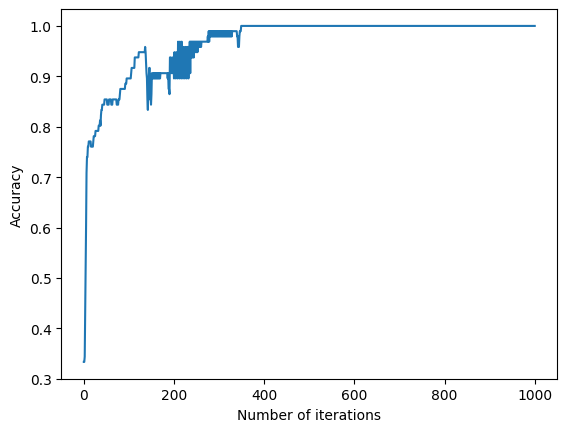

In [377]:
plt.plot([np.sum(np.equal(np.sign(model(x, w)), y))/np.size(y) for w in weight_history])
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Cost')

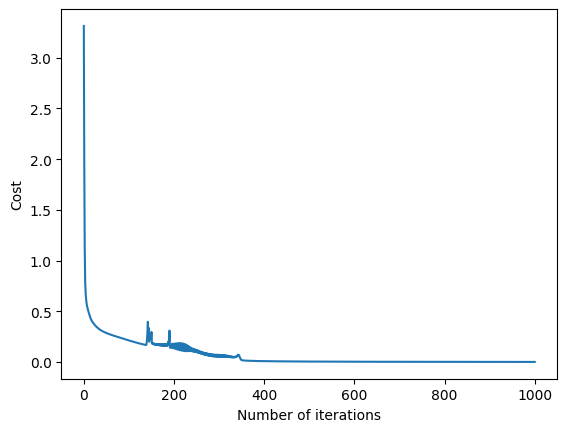

In [378]:
plt.plot(cost_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

We can see that our classifcation accuracy converges to 1 and our cost function converges to 0

## Problem 2 (13.2)

In [379]:
data = np.loadtxt('3_layercake_data.csv', delimiter=',')
x = data[:2,:]
y = data[2,:][np.newaxis,:]

print(np.shape(x))
print(np.shape(y))

(2, 110)
(1, 110)


In [380]:
x = normalize(x)

In [381]:
layer_sizes = [2, 12, 5, 3]
theta = network_initializer(layer_sizes, 1)

In [382]:
def multi_softmax(w):

    model_output = model(x,w)
    cost = np.sum(np.log(np.sum(np.exp(model_output), axis=0)) - np.array([model_output[int(y[0][i]), i] for i in range(len(y[0]))]))
    return cost/float(np.size(y))

In [383]:
alpha = 0.4
num_iter = 1000
weight_history, cost_history = gradient_descent(multi_softmax, alpha, num_iter, theta)

Text(0, 0.5, 'Accuracy')

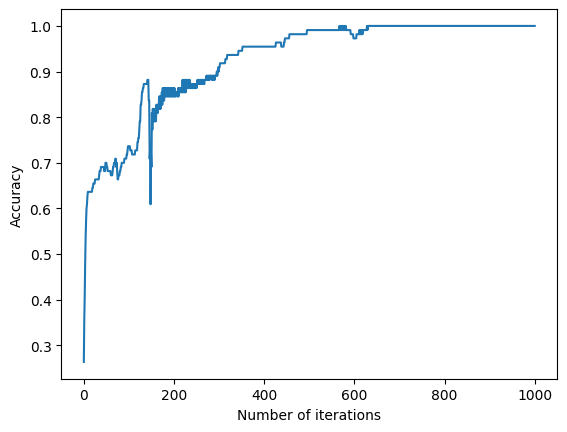

In [384]:
plt.plot([np.sum(np.equal(np.argmax(model(x, w), axis=0), y))/np.size(y) for w in weight_history])
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Cost')

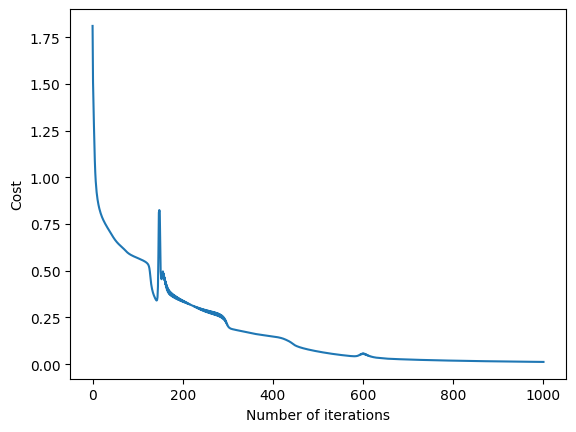

In [385]:
plt.plot(cost_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

We can see that our classifcation accuracy converges to 1 and our cost function converges to 0

## Problem 3 (13.3)

### (a)

Between any two layers (with number of units N and M, respectively) in a general feed-forward neural network, there are $N\times (M+1)$ tunable parameters corresponding to each connection between units ($N\times M$) and the connections between the bias term of the first layer and each unit in the second layer ($M$). Therefore, for a general L-hidden-layer neural network where $N$ is the input dimension, $U_1$ through $U_L$ are the number of desired units in the hidden layers $1$ through $L$, respectively, and $C$ is the ouput dimension, we have the total number of tunable parameters $$Q = N(U_1 + 1) + \Sigma_{i=1}^{L-1} U_i(U_{i+1} + 1) + U_L(C+1)$$

### (b)

The input dimension $N$ contributes to $Q$ only through a linear relationship with the number of units in the first hidden layer ($U_1$), while the number of datapoints $P$ does not contribute to $Q$ at all.